# **Узнать причину от чего зависит успеваемость ученика**


---



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Гипотезы:


1.   Пренадлежность к расе/группе *(по идее бред, но все же)*
2.   Влияние уровня образования родителя *(тож кажется бред, но уже более-менее)*
3.   Влияние предподготовки *(весомый аргумент, уже что-то)*
4.   Just for fun влияние обеда *(lunch)* 😂


### **Гипотеза 1**
Пренадлежность к расе/группе

In [ ]:
df_by_race = df[['race/ethnicity', 'math score', 'reading score', 'writing score']]
df_by_race.groupby(['race/ethnicity']).mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


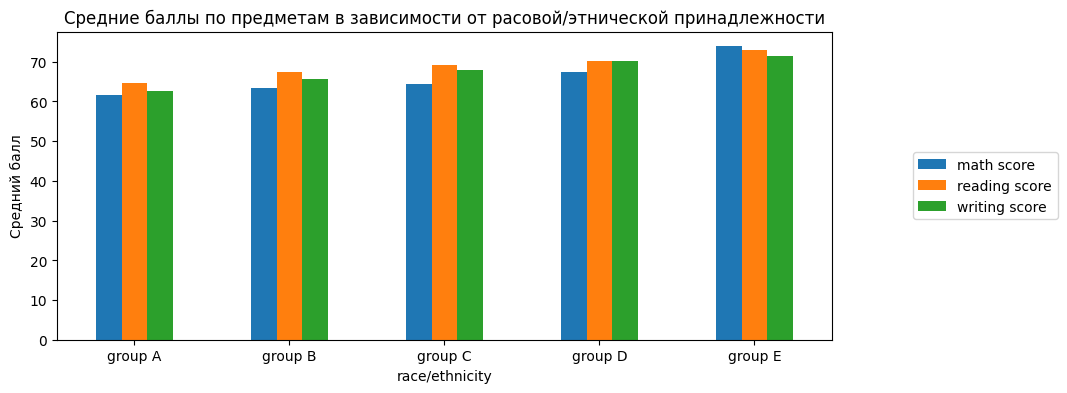

In [ ]:
df_race = df_by_race.groupby(['race/ethnicity']).mean()

df_race.plot(kind='bar', figsize=(10, 4))
plt.title('Средние баллы по предметам в зависимости от расовой/этнической принадлежности')
plt.ylabel('Средний балл')
plt.xticks(rotation=0)
plt.legend(loc='center right', bbox_to_anchor = (1, 0.5, 0.3, 0))
plt.show()

In [ ]:
df_by_race.groupby(['race/ethnicity']).median()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.0,64.0,62.0
group B,63.0,67.0,67.0
group C,65.0,71.0,68.0
group D,69.0,71.0,72.0
group E,74.5,74.0,72.0


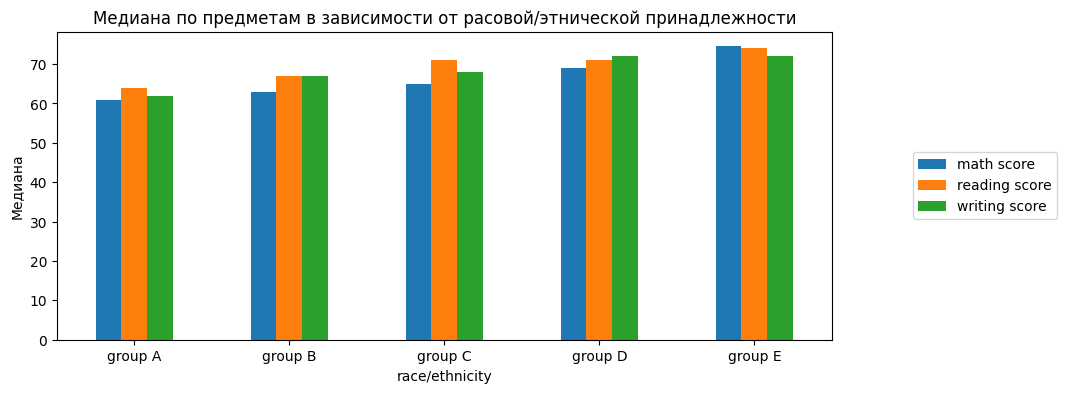

In [ ]:
df_race_med = df_by_race.groupby(['race/ethnicity']).median()

df_race_med.plot(kind='bar', figsize=(10, 4))
plt.title('Медиана по предметам в зависимости от расовой/этнической принадлежности')
plt.ylabel('Медиана')
plt.xticks(rotation=0)
plt.legend(loc='center right', bbox_to_anchor = (1, 0.5, 0.3, 0))
plt.show()

### **Промежуточные итоги**
в группе Е *средние показатели* и *медиана* выше остальных

### **Гипотеза 2**
Влияние уровня образования родителя

In [ ]:
df_educ = df[['parental level of education', 'math score', 'reading score', 'writing score']]
df_educ.groupby(['parental level of education']).mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


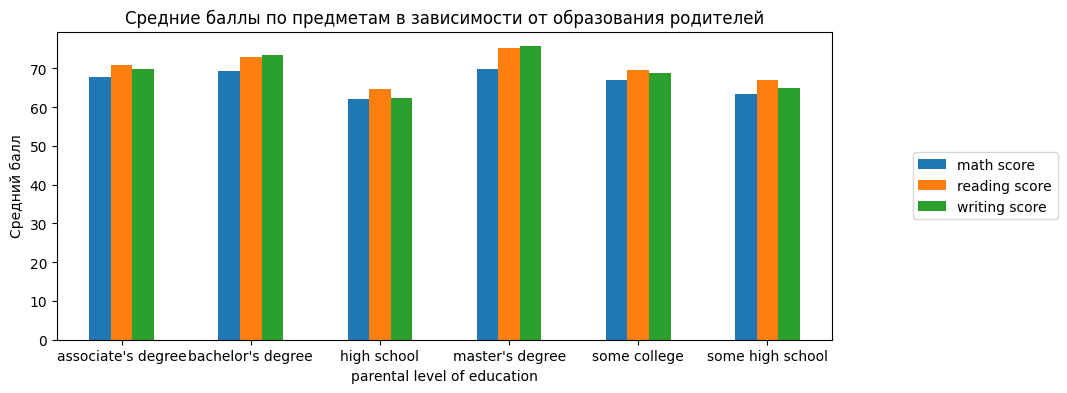

In [ ]:
df_educ_avg = df_educ.groupby(['parental level of education']).mean()

df_educ_avg.plot(kind='bar', figsize=(10, 4))
plt.title('Средние баллы по предметам в зависимости от образования родителей')
plt.ylabel('Средний балл')
plt.xticks(rotation=0)
plt.legend(loc='center right', bbox_to_anchor = (1, 0.5, 0.3, 0))
plt.show()

In [ ]:
df_educ.groupby(['parental level of education']).median()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.0,72.5,70.5
bachelor's degree,68.0,73.0,74.0
high school,63.0,66.0,64.0
master's degree,73.0,76.0,75.0
some college,67.5,70.5,70.0
some high school,65.0,67.0,66.0


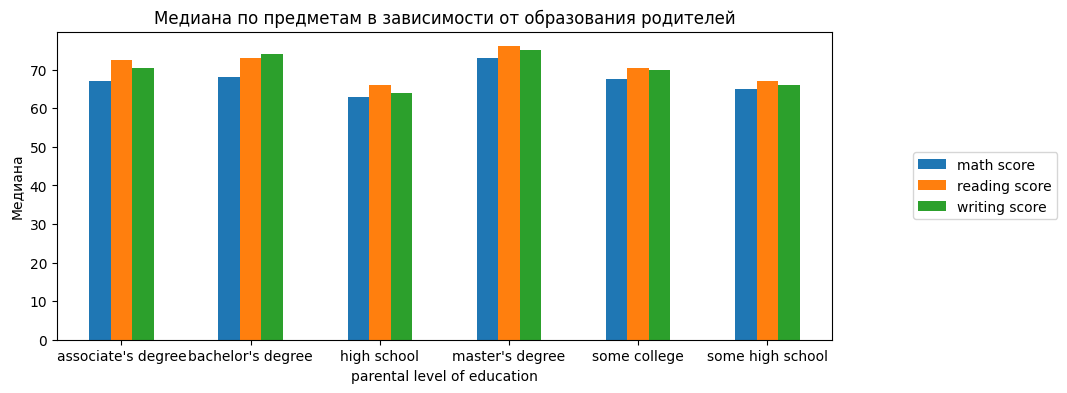

In [ ]:
df_educ_med = df_educ.groupby(['parental level of education']).median()

df_educ_med.plot(kind='bar', figsize=(10, 4))
plt.title('Медиана по предметам в зависимости от образования родителей')
plt.ylabel('Медиана')
plt.xticks(rotation=0)
plt.legend(loc='center right', bbox_to_anchor = (1, 0.5, 0.3, 0))
plt.show()

### **Промежуточные итоги гипотезы 2**
у родителей с образованием со степенью бакалавра и магистра средняя и медиана чуть выше остальных

### **Гипотеза 3**
Влияние предподготовки

In [ ]:
df_prep = df[['test preparation course', 'math score', 'reading score', 'writing score']]
df_prep.groupby(['test preparation course']).mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


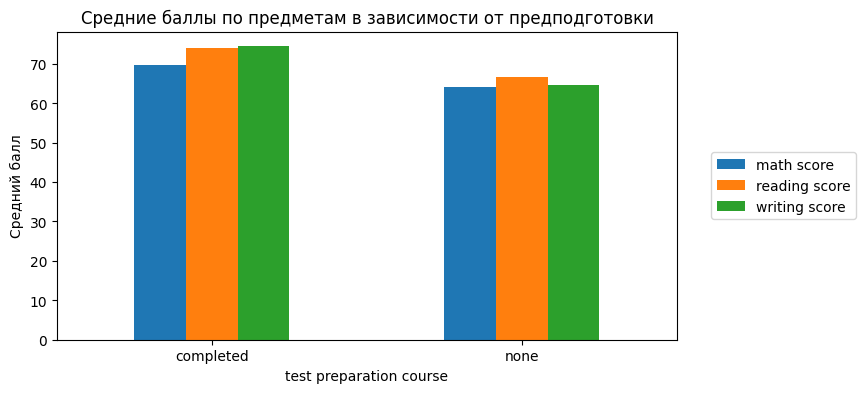

In [ ]:
df_prep_avg = df_prep.groupby(['test preparation course']).mean()

df_prep_avg.plot(kind='bar', figsize=(8, 4))
plt.title('Средние баллы по предметам в зависимости от предподготовки')
plt.ylabel('Средний балл')
plt.xticks(rotation=0)
plt.legend(loc='center right', bbox_to_anchor = (1, 0.5, 0.3, 0))
plt.show()

In [ ]:
df_prep.groupby(['test preparation course']).median()

,math score,reading score,writing score
test preparation course,,,
completed,69.0,75.0,76.0
none,64.0,67.0,65.0


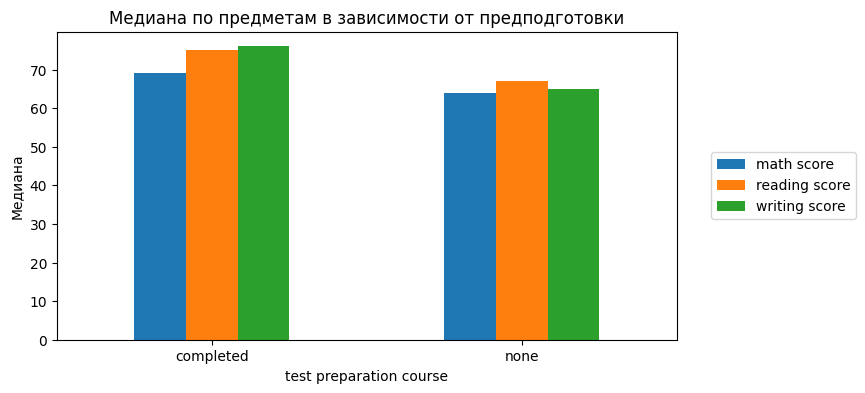

In [ ]:
df_prep_med = df_prep.groupby(['test preparation course']).median()

df_prep_med.plot(kind='bar', figsize=(8, 4))
plt.title('Медиана по предметам в зависимости от предподготовки')
plt.ylabel('Медиана')
plt.xticks(rotation=0)
plt.legend(loc='center right', bbox_to_anchor = (1, 0.5, 0.3, 0))
plt.show()

In [ ]:
df_prep.groupby(['test preparation course']).min()

,math score,reading score,writing score
test preparation course,,,
completed,23,37,36
none,0,17,10


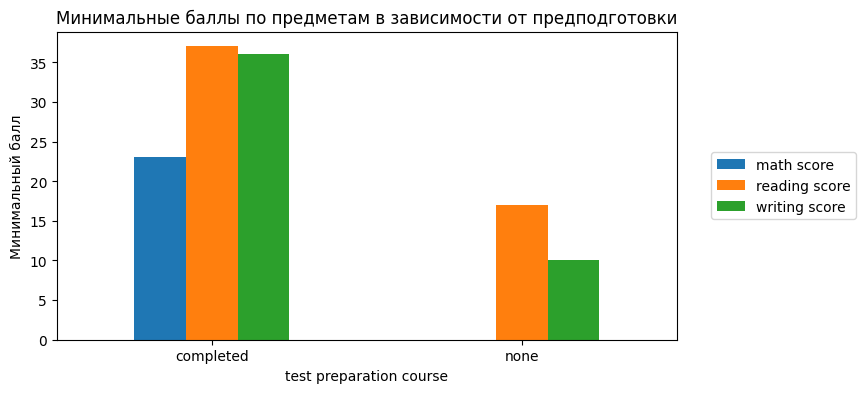

In [ ]:
df_prep_min = df_prep.groupby(['test preparation course']).min()

df_prep_min.plot(kind='bar', figsize=(8, 4))
plt.title('Минимальные баллы по предметам в зависимости от предподготовки')
plt.ylabel('Минимальный балл')
plt.xticks(rotation=0)
plt.legend(loc='center right', bbox_to_anchor = (1, 0.5, 0.3, 0))
plt.show()

### **Промежуточные итоги гипотезы 3**


*   По среднему значению и медиане у студентов, прошедших предподготовку выше по всем показателям
*   При сравнении мин значений у предподготовленных студентов отрыв колосальный

### **Небольшой storytelling и новая гипотеза**


---


После гипотез 2 и 3 возникла мысль - а есть ли связь между образованием родителей и предподготовкой? \
\
Верно ли утверждать, что родители со степенью бакалавра и магистра больше заинтересованы в результатах своих детей, плюс имеют возможность пройти курс

In [7]:
# Рассчёт доли посещений курсов для каждого уровня образования родителей
course_stats = df.groupby('parental level of education')['test preparation course'].apply(lambda x: (x == 'completed').mean())
course_stats

,test preparation course
parental level of education,
associate's degree,0.369369
bachelor's degree,0.389831
high school,0.285714
master's degree,0.338983
some college,0.340708
some high school,0.430168


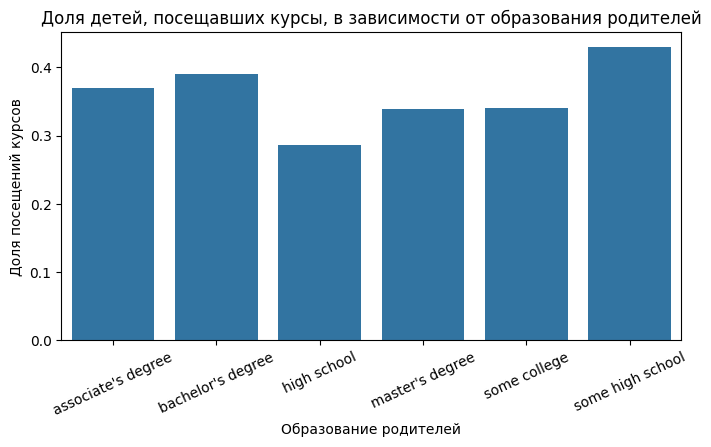

In [19]:
grouped_data = course_stats.reset_index()
grouped_data.columns = ['степень образования родителей', 'доля посещений курсов']

# Построение графика
plt.figure(figsize=(8,4))
sns.barplot(data=grouped_data, x='степень образования родителей', y='доля посещений курсов')
plt.title('Доля детей, посещавших курсы, в зависимости от образования родителей')
plt.ylabel('Доля посещений курсов')
plt.xlabel('Образование родителей')
plt.xticks(rotation=25)
plt.show()

Полученные результаты **не подтвердили** данную гипотезу

### **Гипотеза 4**
Just for fun влияние обеда (lunch) 😂

In [ ]:
df[['lunch', 'math score', 'reading score', 'writing score']].groupby('lunch').mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


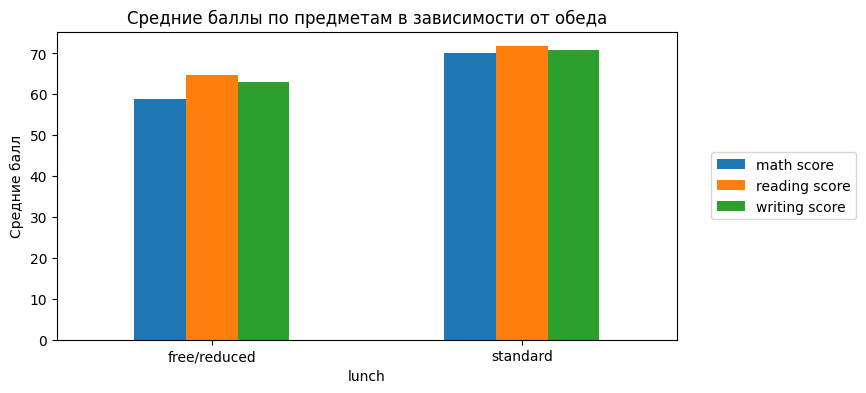

In [ ]:
df[['lunch', 'math score', 'reading score', 'writing score']].groupby('lunch').mean().plot(kind='bar', figsize=(8, 4))
plt.title('Средние баллы по предметам в зависимости от обеда')
plt.ylabel('Средние балл')
plt.xticks(rotation=0)
plt.legend(loc='center right', bbox_to_anchor = (1, 0.5, 0.3, 0))
plt.show()

In [ ]:
df[['lunch', 'math score', 'reading score', 'writing score']].groupby('lunch').median()

,math score,reading score,writing score
lunch,,,
free/reduced,60.0,65.0,64.0
standard,69.0,72.0,72.0


### **Итоги по гипотезе 4**

Данные показывают, что студенты на бесплатном питании или с льготами набирают меньше баллов.

Это наталкивает на не очень приятную мысль, что уязвимые слои населения (этнические и расовые группы), в целом, набирают хуже баллы. Одной из причин этого может быть отсутсвие возможности на предподготовку.


---

\
P.S. Данные суждения никак не приследуют цель оскорбить кого-либо по этнической или расовой пренадлежности

### **Попробуем доказать/опровергнуть данную гипотезу**

In [20]:
# Рассчёт доли посещений курсов для каждой группы этнической и расовой пренадлежности
course_stats_by_etn = df.groupby('race/ethnicity')['test preparation course'].apply(lambda x: (x == 'completed').mean())
course_stats_by_etn

,test preparation course
race/ethnicity,
group A,0.348315
group B,0.357895
group C,0.366771
group D,0.312977
group E,0.428571


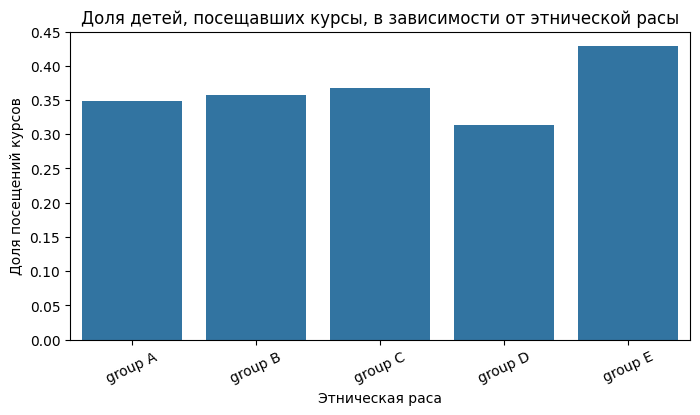

In [21]:
grouped_data_by_etn = course_stats_by_etn.reset_index()
grouped_data_by_etn.columns = ['Этническая раса', 'доля посещений курсов']

# Построение графика
plt.figure(figsize=(8,4))
sns.barplot(data=grouped_data_by_etn, x='Этническая раса', y='доля посещений курсов')
plt.title('Доля детей, посещавших курсы, в зависимости от этнической расы')
plt.ylabel('Доля посещений курсов')
plt.xlabel('Этническая раса')
plt.xticks(rotation=25)
plt.show()

### **Гипотеза опровергнута!**
Взяв данные из гипотезы 1, мы видим, что хуже всех сдала Группа А, но среднее значение этой группы по прохождению предподготовки не отличается от других.

# **Итог**

Взяв за основу выше приведенный анализ гипотиз, можно предположить, что успеваемость зависит от прохождения предподготовки, так как при исследовании минимальных показателей, группа, не прошедшая предкурсы сильно отстает.

А так же нужно подчеркнуть, что этническая раса, пренадлежащая группе Е, больше проходили предподготовительные курсы, а так же набирали хорошие баллы.